# Iris Flower Project

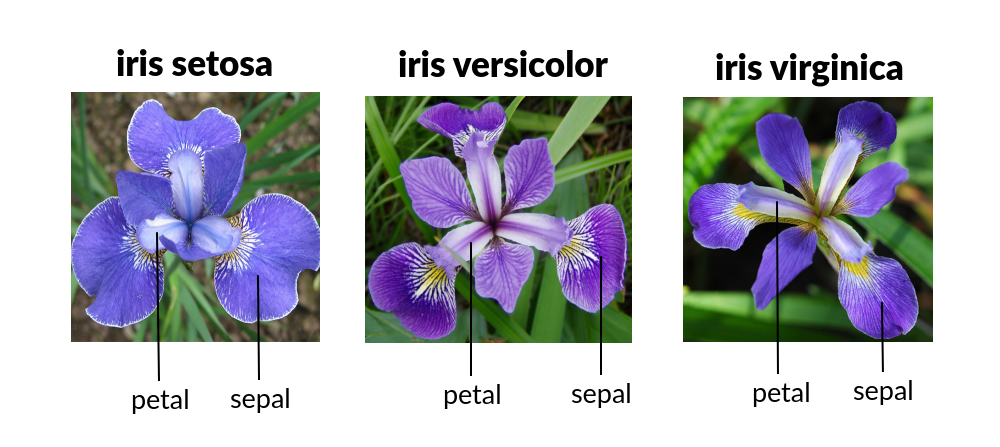

The goal of this project is to develop a machine learning model able to classify the 3 species of Iris flower using measurements of their petals and sepals.

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper. The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

___

## About the data

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other. 

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. 

This data can be downloaded from the <a href="https://archive-beta.ics.uci.edu/ml/datasets/iris">UC Irvine Machine Learning Repository</a> and differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick@espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.

**Data originally publlished in:**
 - R. A. Fisher (1936). <a href="https://onlinelibrary.wiley.com/doi/10.1111/j.1469-1809.1936.tb02137.x">The use of multiple measurements in taxonomic problems.</a> Annals of Eugenics. 7 (2): 179–188.

___

## Data preparation

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('iris.data',sep=',',
                 header=None,
                 names=['sepal_length','sepal_width','petal_length','petal_width','species'])

In [3]:
df['species'] = df['species'].str.split('-').str[1]

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.shape

(150, 5)

### Correcting known errors

In [6]:
df.iloc[34] # the 35th row

sepal_length       4.9
sepal_width        3.1
petal_length       1.5
petal_width        0.1
species         setosa
Name: 34, dtype: object

In [7]:
df.at[34,'petal_width'] = 0.2

In [8]:
df.iloc[37]# the 38th row

sepal_length       4.9
sepal_width        3.1
petal_length       1.5
petal_width        0.1
species         setosa
Name: 37, dtype: object

In [9]:
df.at[37,'sepal_width'] = 3.6
df.at[37,'petal_length'] = 1.4

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


There is no missing values so we can go straight to visualize the data and basic EDA

## Exploratory Data Analysis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

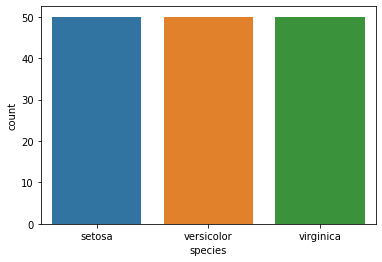

In [13]:
sns.countplot(data=df,x='species');

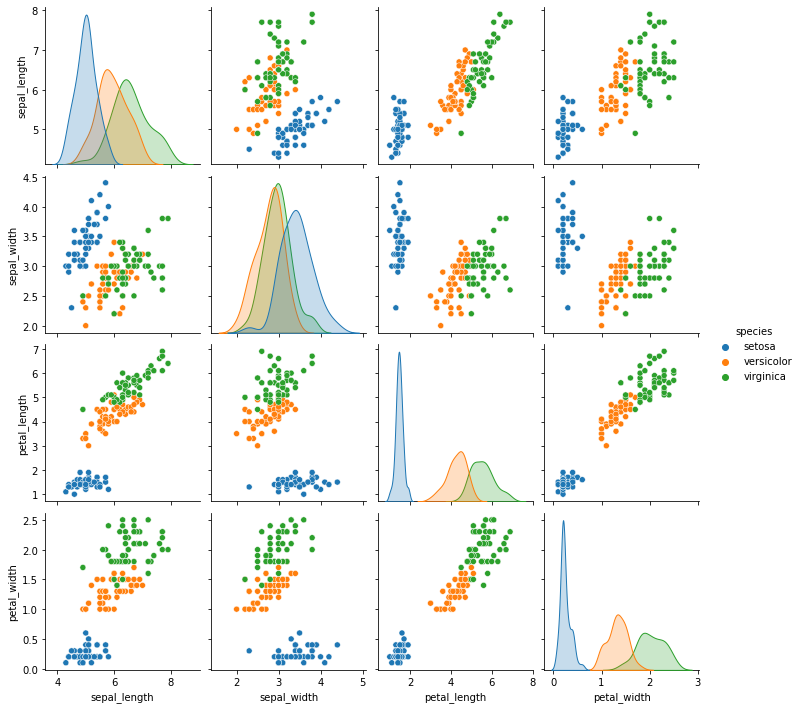

In [14]:
sns.pairplot(df,hue='species')

Petal measurements seem to be a good feature to identify species altough versicolor and virginica overlap. Let's zoom in on the features and check their distribution with boxplots

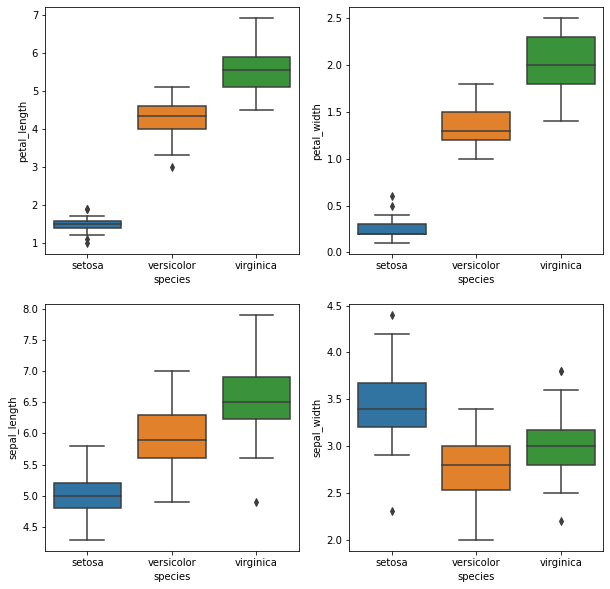

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(data=df,x='species',y='petal_length')

plt.subplot(2,2,2)
sns.boxplot(data=df,x='species',y='petal_width')

plt.subplot(2,2,3)
sns.boxplot(data=df,x='species',y='sepal_length')

plt.subplot(2,2,4)
sns.boxplot(data=df,x='species',y='sepal_width');

Looking at the correlation between features. Sepal length is stronlgy correlated to both petal features while sepal width have a weaker and inverse correlation.

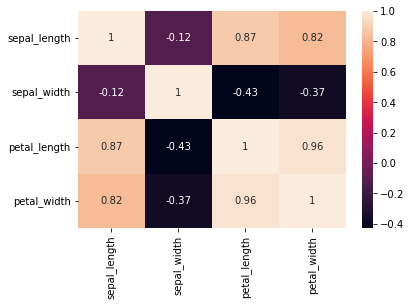

In [16]:
sns.heatmap(df.corr(),annot=True)
plt.xticks(rotation=90);

___

## Machine Learning

We will be using Support Vector Machine Classifier on this dataset.

In [79]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Splitting the data

In [80]:
X = df.drop('species',axis=1)
y = df['species']

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.1, random_state=101)

### Scaling the data

Altough the scale of the features don't look too apart we have decided to scale them since petal_width seem to be a bit far from the rest.

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()

In [85]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Base Model

In [86]:
from sklearn.svm import SVC

In [87]:
svc = SVC()

In [88]:
param_dict = svc.get_params()

In [89]:
print('Parameters currently in use:\n')
param_dict

Parameters currently in use:



{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Hyperparameter tunning

In [107]:
from sklearn.model_selection import GridSearchCV

In [134]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'gamma':['scale','auto'],
             'kernel':['rbf','linear']}

In [135]:
grid = GridSearchCV(svc,param_grid)

In [136]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']})

In [137]:
grid.best_params_

{'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'}

In [138]:
cv_results = pd.DataFrame(grid.cv_results_)

In [146]:
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002078,0.000372,0.000783,0.000198,0.001,scale,rbf,"{'C': 0.001, 'gamma': 'scale', 'kernel': 'rbf'}",0.37037,0.37037,0.333333,0.333333,0.333333,0.348148,0.018144,15
1,0.001490,0.000193,0.000485,0.000039,0.001,scale,linear,"{'C': 0.001, 'gamma': 'scale', 'kernel': 'line...",0.37037,0.37037,0.333333,0.333333,0.333333,0.348148,0.018144,15
2,0.001767,0.000299,0.000618,0.000120,0.001,auto,rbf,"{'C': 0.001, 'gamma': 'auto', 'kernel': 'rbf'}",0.37037,0.37037,0.333333,0.333333,0.333333,0.348148,0.018144,15
3,0.001746,0.000417,0.000681,0.000199,0.001,auto,linear,"{'C': 0.001, 'gamma': 'auto', 'kernel': 'linear'}",0.37037,0.37037,0.333333,0.333333,0.333333,0.348148,0.018144,15
4,0.003107,0.001381,0.001075,0.000406,0.01,scale,rbf,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}",0.37037,0.37037,0.333333,0.333333,0.333333,0.348148,0.018144,15


In [152]:
cv_results[cv_results['param_C'] == 0.5]['mean_test_score'].mean()

0.9592592592592593

### Final Model Evaluation

In [141]:
y_pred = grid.predict(scaled_X_test)

In [142]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [143]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      1.00      1.00         3
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



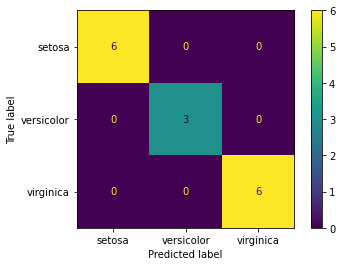

In [144]:
plot_confusion_matrix(grid,scaled_X_test,y_test);